## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.sample(10)

,user_id,timestamp,group,landing_page,converted
282116,936671,2017-01-15 06:53:08.056924,treatment,new_page,0
85207,739685,2017-01-21 14:22:44.323806,treatment,new_page,0
57903,890485,2017-01-08 06:30:43.185670,treatment,new_page,0
36088,836856,2017-01-02 23:30:53.044809,treatment,new_page,0
294292,865971,2017-01-07 17:56:01.759713,control,old_page,0
197042,858000,2017-01-20 11:58:12.485849,treatment,new_page,0
111514,718855,2017-01-17 07:02:17.273001,control,old_page,0
163245,664414,2017-01-15 23:23:08.400346,treatment,new_page,0
184645,880344,2017-01-18 16:32:06.385350,control,old_page,0
148889,677832,2017-01-03 11:16:24.180501,treatment,new_page,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [5]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [6]:
print(df[df.user_id.duplicated()].info())
len(df.user_id.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3894 entries, 2656 to 294355
Data columns (total 5 columns):
user_id         3894 non-null int64
timestamp       3894 non-null object
group           3894 non-null object
landing_page    3894 non-null object
converted       3894 non-null int64
dtypes: int64(2), object(3)
memory usage: 182.5+ KB
None


290584

In [7]:
290584+3894

294478

In [8]:
df_unique = df.drop_duplicates(subset = 'user_id')

In [9]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


d. The proportion of users converted.

In [10]:
df.query("converted == 1").shape[0]/df.shape[0]*100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't line up.

In [11]:
df.query("group == 'treatment' & landing_page == 'old_page' ").shape[0]+df.query("group == 'control' & landing_page == 'new_page' ").shape[0]

3893

In [12]:
df.groupby(by = ['group', 'landing_page']).agg('count')

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

f. Do any of the rows have missing values?

In [13]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
df2 = df.query("landing_page == 'new_page' & group == 'treatment'")
df2 = pd.concat([df2, df.query("landing_page == 'old_page' & group == 'control'")])

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2.user_id.unique().shape[0]

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

shown above.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2.drop(2893, axis =0, inplace=True)

In [19]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
float(df2.query("converted == 1").shape[0]/df2.shape[0])

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

Using conditional probability:

In [21]:
p_old_original = df2.query("group == 'control' & converted == 1").shape[0]/df2.query("group == 'control'").shape[0]
p_old_original

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
p_new_original = df2.query("group == 'treatment' & converted == 1").shape[0]/df2.query("group == 'treatment'").shape[0]
p_new_original

0.11880806551510564

In [23]:
p_diff_original = p_new_original - p_old_original
p_diff_original

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [24]:
df2.query("landing_page == 'new_page'").shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Answer: Based on the results above, we see that the difference in the convertion rate seems small, but we should go futher and use a statistical analysis to conclude if this difference is statiscally significant or not.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Under the assumptions above, the null hypothesis should be that the old page is better than the new one, while the alternative hypothesis should be that the new page is better than the old one. In terms of converted rates:**

$$H_0: p_{old} = p_{new}\\H_1: p_{old} < p_{new}$$

alternatively, we can state the hyphotheses in terms of differences:

$$H_0: p_{new} - p_{old}= 0 \\H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

Under the null, both rates are equal to the converted rate regardless of the page received, and are equal to the rate in `ab_data.csv`: 

In [25]:
p_new_null = df2.query("converted == 1").shape[0]/df2.shape[0]
p_new_null

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old_null = df2.query("converted == 1").shape[0]/df2.shape[0]
p_old_null

0.11959708724499628

c. What is $n_{new}$?

In [27]:
n_new = df2.query("group == 'treatment'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [28]:
n_old = df2.query("group == 'control'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.choice(2, size = n_new, p=[1-p_new_null, p_new_null])

vejamos se a taxa de conversão se aproxima do valor p_new_null:

In [30]:
new_page_converted.mean()

0.11990227788865185

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.choice(2, size = n_old, p=[1-p_old_null, p_old_null])

vejamos se a taxa de conversão se aproxima do valor p_old_null:

In [32]:
old_page_converted.mean()

0.1198149703319245

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
new_page_converted.mean() - old_page_converted.mean()

8.730755672735346e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [34]:
p_diffs = []
for _ in range(1000):
    new_page_converted = np.random.choice(2, size = n_new, p=[1-p_new_null, p_new_null])
    old_page_converted = np.random.choice(2, size = n_old, p=[1-p_old_null, p_old_null])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Let's plot the ``p_diff_original`` as well, in order to help to visualize the next question:

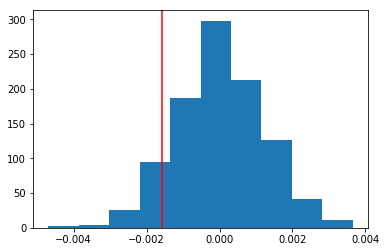

In [35]:
plt.hist(p_diffs)
plt.axvline(p_diff_original, 0,color = 'red');

Indeed, it its what we expected, since both new and old simulations were made under the same probabilities states, so they should have very similar converted rates. Therefore, it was likely to see that the *difference* between these simulated convertions have a normal distribution over zero. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
len([x for x in p_diffs if x > p_diff_original])/len(p_diffs)

0.904

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We've just computed the *p_value* of a hypothesis test with the previous hypothesis $H_0$ and $H_1$. Under the assumptions that the converted rates have a random distribution with probabilities equal to that in ``ab_data.csv``, and that in the null hypothesis we have these probabilities equal (and therefore the mean of the difference distribution is zero), we see that the observed difference convertion rate falls relatively close to zero and negative, with a high p_value of 0.9033. So, we can not reject the null hypothesis that both pages have the same convertion rates, with a typical significance of $\alpha=5\%$.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = len(df2.query("converted == 1 &  group == 'control'").converted)
convert_new =  len(df2.query("converted == 1 &  group == 'treatment'").converted)
n_old =  len(df2.query("group == 'control'").converted)
n_new = len(df2.query("group == 'treatment'").converted)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
stat, pval = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger') 

In [39]:
stat

-1.3109241984234394

In [40]:
pval

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score and p-value obtained here confirm the same findings in parts (k) and (k). The z-score is negative and close to zero, indicating that p_new is not larger than p_old, and the p-value indicate that, being as high as the previus p-value found. With a significance of $\alpha=5\\%$, we can not reject the null hypothesis that both pages have the same convertion rates.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since we want ot investigate a Yes/No or Sucess/Not Sucess problem, i.e binary outbput, we better use the *Logistic Regression*.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2.group).treatment

In [42]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [43]:
logit_model = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
results = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 16 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        11:21:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value for `ab_page` coefficient is `0.190`. Here, in logit regression, the null hypothesis for this coefficient in particular is that it is equals to zero, while the alternative hypothesis is that it is *different* from zero. In Part II, we investigated whether or not the difference between proportions for old and new pages have statistic significant variations. That is a different test for different hypothesis. However, in logit regression we see that the p-value is higher than a typical significance of 5%, so we can not reject this null hypothesis as well, and the regression becomes weak. This is confirmed with the `LLR p-value` equals 0.1899 for the whole logistic prediction, which is also a high value for a typical significance of 5%**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The consideration of other attributes in the regression model can improve the regression efficiency, especially if we consider attributes that seem relevant in this analysis, like: time spent in the page, period of day accessed etc. They can improve our regression model p-value in general. Yet, it is still possible that the `ab_page` variable does not get a statistically significant p-value, remaining not relevant for the regression.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [46]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [47]:
### Create the necessary dummy variables
pd.get_dummies(df_new.country).head()

,CA,UK,US
user_id,,,
834778,0,1,0
928468,0,0,1
822059,0,1,0
711597,0,1,0
710616,0,1,0


In [48]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new.country)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [49]:
logit_model = sm.Logit(df_new.converted, df_new[['intercept', 'CA', 'UK']])
results = logit_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 16 Mar 2019   Pseudo R-squ.:               1.521e-05
Time:                        11:21:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**We see that the p-values for `CA` and `UK` are higher that our signifance of $5/%$, as well as the p-value for the whole test, in `LLR p-value`. That means that the model did not fit well.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
### Fit Your Linear Model And Obtain the Results
logit_model = sm.Logit(df_new.converted, df_new[['intercept', 'ab_page', 'CA', 'UK']])
results = logit_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 16 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        11:26:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

**From the results above, we see that `ab_page` coefficient pratically did not change compared with the previous model, maintaining  a high p-value together with `CA` and  `UK`. The LRL p-value for the model dropped just a little bit, remaining higher than 5%. Therefore, the model is almost nothing better than the previous, since neighter of the coefficients are statistically significant.**

<a id='conclusions'></a>
## Conclusions


Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.